In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import folium

## Read files into geopandas Dataframe

In [2]:
# Load petrol station data
stations = gpd.read_file(r"D:/GeospatialHackathon/Petrol Station Probe Data/Dataset/Data_for_hackathon/Stale_Petrol_station/Petrol_Station/Petrol_Station/petrol_station_jakarta.shp")
print("Petrol Station Data:")
print(stations.head())
# Save petrol station data to CSV
stations.to_csv("petrol_stations.csv", index=False)

# Load probe data
probe_data = gpd.read_file(r"D:/GeospatialHackathon/Petrol Station Probe Data/Dataset/Data_for_hackathon/Stale_Petrol_station/IDN_Q223_May23_Jakarta/Probe.shp")
print("\nProbe Data:")
print(probe_data.head())
# Save probe data to CSV
probe_data.to_csv("probe_data.csv", index=False)

# Load probe data
road_data = gpd.read_file(r"D:/GeospatialHackathon/Petrol Station Probe Data/Dataset/Data_for_hackathon/Stale_Petrol_station/Petrol_Station/Petrol_Station/road.shp")
print("\Raod Data:")
print(road_data.head())
# Save road data to CSV
road_data.to_csv("road_data.csv", index=False)

<>:17: SyntaxWarning: invalid escape sequence '\R'
<>:17: SyntaxWarning: invalid escape sequence '\R'
C:\Users\uzmap\AppData\Local\Temp\ipykernel_17340\1852230210.py:17: SyntaxWarning: invalid escape sequence '\R'
  print("\Raod Data:")


Petrol Station Data:
  placeid           name  displaylat  displaylon                    geometry
0       1      Pertamina   -6.145160  106.894510  POINT (106.89451 -6.14516)
1       2          Shell   -6.126501  106.787652  POINT (106.78765 -6.12650)
2       3      Pertamina   -6.202623  106.806137  POINT (106.80614 -6.20262)
3       4      Pertamina   -6.311140  106.771830  POINT (106.77183 -6.31114)
4       5  Mandiri Motor   -6.197810  106.769170  POINT (106.76917 -6.19781)

Probe Data:
   WEIGHT  DIS2NT                    geometry
0       1      31  POINT (106.85278 -6.34337)
1       1     172  POINT (106.85275 -6.34469)
2       4     166  POINT (106.85276 -6.34483)
3       2     750  POINT (106.97833 -6.18029)
4       1    9999  POINT (106.86943 -6.37057)
\Raod Data:
    osm_id  code     fclass                          name   ref oneway  \
0  4705040  5113    primary             Jalan Pasar Senen  None      F   
1  4705043  5115   tertiary       Jalan Gunung Sahari III  None     

## Check for Co-ordinate systems similarity

In [3]:
print("Stations CRS:", stations.crs)
print("Probe Data CRS:", probe_data.crs)
print("Probe Data CRS:", road_data.crs)

Stations CRS: GEOGCS["GCS_WGS84_geographiques_dms",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
Probe Data CRS: EPSG:4326
Probe Data CRS: EPSG:4326


In [4]:
stations = stations.to_crs(epsg=4326)
print("Updated Stations CRS:", stations.crs)
print("Probe Data CRS:", probe_data.crs)

Updated Stations CRS: EPSG:4326
Probe Data CRS: EPSG:4326


## Basic Plot of Probes & PetrolStations

C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


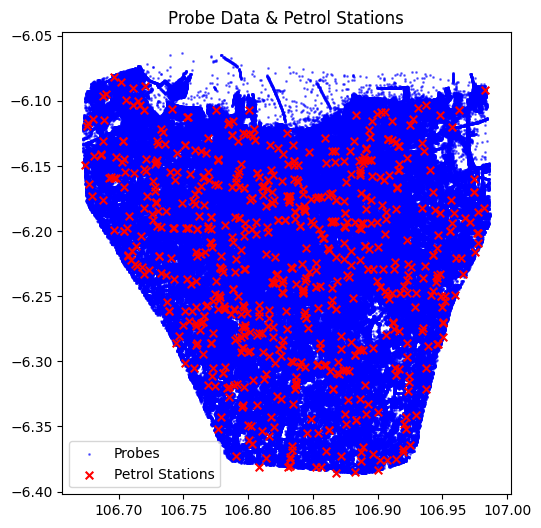

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Plot probe data (blue)
probe_data.plot(ax=ax, color='blue', markersize=1, alpha=0.5, label="Probes")

# Plot petrol stations (red)
stations.plot(ax=ax, color='red', markersize=30, marker="x", label="Petrol Stations")

plt.legend()
plt.title("Probe Data & Petrol Stations")
plt.show()

## Merge petrol_stations data with Probes data based on nearest geometry

In [6]:
# Print initial row counts
print(f"Initial Petrol Stations Count: {len(stations)}")
print(f"Initial Probes Count: {len(probe_data)}")

# Perform spatial join to find the nearest petrol station for each probe
probes_with_stations = gpd.sjoin_nearest(probe_data, stations, how="left", distance_col="distance_to_station")

# Print final row count
print(f"Final Combined Dataset Count: {len(probes_with_stations)}")  # Should match probes count

# Save the result
probes_with_stations.to_csv("probes_with_nearest_stations.csv", index=False)

# Display first few rows
print(probes_with_stations.head())

Initial Petrol Stations Count: 688
Initial Probes Count: 463043


c:\Users\uzmap\anaconda3\envs\pythonPractice\Lib\site-packages\geopandas\array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


Final Combined Dataset Count: 464840
   WEIGHT  DIS2NT                    geometry  index_right placeid  \
0       1      31  POINT (106.85278 -6.34337)           70      71   
1       1     172  POINT (106.85275 -6.34469)           70      71   
2       4     166  POINT (106.85276 -6.34483)           70      71   
3       2     750  POINT (106.97833 -6.18029)          235     236   
4       1    9999  POINT (106.86943 -6.37057)          395     396   

                name  displaylat  displaylon  distance_to_station  
0  Warung Bang Jamin   -6.344676  106.848766             0.004223  
1  Warung Bang Jamin   -6.344676  106.848766             0.003987  
2  Warung Bang Jamin   -6.344676  106.848766             0.003995  
3               Dodo   -6.182198  106.982084             0.004216  
4          Pertamina   -6.373070  106.872050             0.003617  


In [7]:
duplicate_probes = probes_with_stations['geometry'].duplicated(keep=False)
print(f"Duplicated probes count: {duplicate_probes.sum()}")

Duplicated probes count: 3594


In [23]:
stations.head()

,placeid,name,displaylat,displaylon,geometry
0,1,Pertamina,-6.145160,106.894510,POINT (106.89451 -6.14516)
1,2,Shell,-6.126501,106.787652,POINT (106.78765 -6.12650)
2,3,Pertamina,-6.202623,106.806137,POINT (106.80614 -6.20262)
3,4,Pertamina,-6.311140,106.771830,POINT (106.77183 -6.31114)
4,5,Mandiri Motor,-6.197810,106.769170,POINT (106.76917 -6.19781)


In [25]:
probes_with_stations.head()

,WEIGHT,DIS2NT,geometry,placeid,name,displaylat,displaylon,distance_to_station
0,1,31,POINT (106.85278 -6.34337),71,Warung Bang Jamin,-6.344676,106.848766,0.004223
1,1,172,POINT (106.85275 -6.34469),71,Warung Bang Jamin,-6.344676,106.848766,0.003987
2,4,166,POINT (106.85276 -6.34483),71,Warung Bang Jamin,-6.344676,106.848766,0.003995
3,2,750,POINT (106.97833 -6.18029),236,Dodo,-6.182198,106.982084,0.004216
4,1,9999,POINT (106.86943 -6.37057),396,Pertamina,-6.373070,106.872050,0.003617


In [26]:
probes_with_stations = probes_with_stations.to_crs(epsg=4326)
road_data = road_data.to_crs(epsg=4326)

## Merge petrol_stations & Probes merged data with Roads Data based on nearest geometry

In [ ]:
probes_with_stations_roads = gpd.sjoin_nearest(
    probes_with_stations, road_data, how="left", distance_col="distance_to_road"
)

# Save the final dataset
probes_with_stations_roads.to_csv("probes_with_stations_and_roads.csv", index=False)

# Display first few rows to verify the join
print(probes_with_stations_roads.head())

c:\Users\uzmap\anaconda3\envs\pythonPractice\Lib\site-packages\geopandas\array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


   WEIGHT  DIS2NT                    geometry placeid          name_left  \
0       1      31  POINT (106.85278 -6.34337)      71  Warung Bang Jamin   
1       1     172  POINT (106.85275 -6.34469)      71  Warung Bang Jamin   
2       4     166  POINT (106.85276 -6.34483)      71  Warung Bang Jamin   
3       2     750  POINT (106.97833 -6.18029)     236               Dodo   
4       1    9999  POINT (106.86943 -6.37057)     396          Pertamina   

   displaylat  displaylon  distance_to_station  index_right     osm_id  code  \
0   -6.344676  106.848766             0.004223        99831  563177706  5122   
1   -6.344676  106.848766             0.003987        99787  563177637  5123   
2   -6.344676  106.848766             0.003995        99786  563177635  5123   
3   -6.182198  106.982084             0.004216        31895  328292661  5122   
4   -6.373070  106.872050             0.003617       100405  563529764  5122   

          fclass name_right   ref oneway  maxspeed  layer brid

In [28]:
probes_with_stations_roads.columns

Index(['WEIGHT', 'DIS2NT', 'geometry', 'placeid', 'name_left', 'displaylat',
       'displaylon', 'distance_to_station', 'index_right', 'osm_id', 'code',
       'fclass', 'name_right', 'ref', 'oneway', 'maxspeed', 'layer', 'bridge',
       'tunnel', 'distance_to_road'],
      dtype='object')

In [29]:
column_nan_count = probes_with_stations_roads.isnull().sum()
column_nan_count

WEIGHT                      0
DIS2NT                      0
geometry                    0
placeid                     0
name_left                   0
displaylat                  0
displaylon                  0
distance_to_station         0
index_right                 0
osm_id                      0
code                        0
fclass                      0
name_right             173820
ref                    451536
oneway                      0
maxspeed                    0
layer                       0
bridge                      0
tunnel                      0
distance_to_road            0
dtype: int64

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\uzmap\Documents\GitHub\GeospatialHackathon\Petrol Station Probe Data\probes_with_stations_and_roads.csv")

# Rename columns for clarity
df = df.rename(columns={
    "name_left": "petrol_station_name",
    "name_right": "road_name"
})

# Drop non-relevant columns
# ['WEIGHT', 'DIS2NT', 'index_right', 'code', 'ref', 'oneway', 'maxspeed', 'layer', 'bridge']
df = df.drop(['index_right','code','road_name','oneway', 'maxspeed','ref','geometry', 'osm_id', 'layer', 'bridge',"petrol_station_name"], axis=1)

df.head()

,WEIGHT,DIS2NT,placeid,displaylat,displaylon,distance_to_station,fclass,tunnel,distance_to_road
0,1,31,71,-6.344676,106.848766,0.004223,residential,F,0.000025
1,1,172,71,-6.344676,106.848766,0.003987,living_street,F,0.000054
2,4,166,71,-6.344676,106.848766,0.003995,living_street,F,0.000081
3,2,750,236,-6.182198,106.982084,0.004216,residential,F,0.000027
4,1,9999,396,-6.373070,106.872050,0.003617,residential,F,0.000004


In [4]:
# Convert categorical features to numerical (One-Hot Encoding)
df = pd.get_dummies(df, columns=["fclass", "tunnel"], drop_first=True)

In [5]:
df.head()

,WEIGHT,DIS2NT,placeid,displaylat,displaylon,distance_to_station,distance_to_road,fclass_cycleway,fclass_footway,fclass_living_street,...,fclass_steps,fclass_tertiary,fclass_tertiary_link,fclass_track,fclass_track_grade3,fclass_track_grade5,fclass_trunk,fclass_trunk_link,fclass_unclassified,tunnel_T
0,1,31,71,-6.344676,106.848766,0.004223,0.000025,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,172,71,-6.344676,106.848766,0.003987,0.000054,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,4,166,71,-6.344676,106.848766,0.003995,0.000081,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2,750,236,-6.182198,106.982084,0.004216,0.000027,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,9999,396,-6.373070,106.872050,0.003617,0.000004,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.columns

Index(['WEIGHT', 'DIS2NT', 'placeid', 'displaylat', 'displaylon',
       'distance_to_station', 'distance_to_road', 'fclass_cycleway',
       'fclass_footway', 'fclass_living_street', 'fclass_motorway',
       'fclass_motorway_link', 'fclass_path', 'fclass_pedestrian',
       'fclass_primary', 'fclass_primary_link', 'fclass_residential',
       'fclass_secondary', 'fclass_secondary_link', 'fclass_service',
       'fclass_steps', 'fclass_tertiary', 'fclass_tertiary_link',
       'fclass_track', 'fclass_track_grade3', 'fclass_track_grade5',
       'fclass_trunk', 'fclass_trunk_link', 'fclass_unclassified', 'tunnel_T'],
      dtype='object')

In [7]:
# List of boolean columns to convert
bool_cols = ['fclass_cycleway','fclass_footway','fclass_living_street','fclass_motorway','fclass_motorway_link',
             'fclass_path','fclass_pedestrian','fclass_primary','fclass_primary_link','fclass_residential','fclass_secondary',
             'fclass_secondary_link','fclass_service','fclass_steps', 'fclass_tertiary', 'fclass_tertiary_link',
       'fclass_track', 'fclass_track_grade3', 'fclass_track_grade5',
       'fclass_trunk', 'fclass_trunk_link', 'fclass_unclassified', 'tunnel_T']  # Add more if needed

# Convert True/False to 1/0
df[bool_cols] = df[bool_cols].astype(int)

# Display first few rows to verify
print(df.head())


   WEIGHT  DIS2NT  placeid  displaylat  displaylon  distance_to_station  \
0       1      31       71   -6.344676  106.848766             0.004223   
1       1     172       71   -6.344676  106.848766             0.003987   
2       4     166       71   -6.344676  106.848766             0.003995   
3       2     750      236   -6.182198  106.982084             0.004216   
4       1    9999      396   -6.373070  106.872050             0.003617   

   distance_to_road  fclass_cycleway  fclass_footway  fclass_living_street  \
0          0.000025                0               0                     0   
1          0.000054                0               0                     1   
2          0.000081                0               0                     1   
3          0.000027                0               0                     0   
4          0.000004                0               0                     0   

   ...  fclass_steps  fclass_tertiary  fclass_tertiary_link  fclass_track  \
0  

In [8]:
df.head()
df.drop('placeid',inplace=True,axis=1)

In [9]:
df.head()

,WEIGHT,DIS2NT,displaylat,displaylon,distance_to_station,distance_to_road,fclass_cycleway,fclass_footway,fclass_living_street,fclass_motorway,...,fclass_steps,fclass_tertiary,fclass_tertiary_link,fclass_track,fclass_track_grade3,fclass_track_grade5,fclass_trunk,fclass_trunk_link,fclass_unclassified,tunnel_T
0,1,31,-6.344676,106.848766,0.004223,0.000025,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,172,-6.344676,106.848766,0.003987,0.000054,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4,166,-6.344676,106.848766,0.003995,0.000081,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,750,-6.182198,106.982084,0.004216,0.000027,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,9999,-6.373070,106.872050,0.003617,0.000004,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


                     outlier_count  lower_bound  upper_bound
WEIGHT                     87166.0  -244.500000   415.500000
DIS2NT                     86633.0   -37.500000    70.500000
distance_to_station         7803.0    -0.003394     0.013806
distance_to_road           40037.0    -0.000115     0.000239


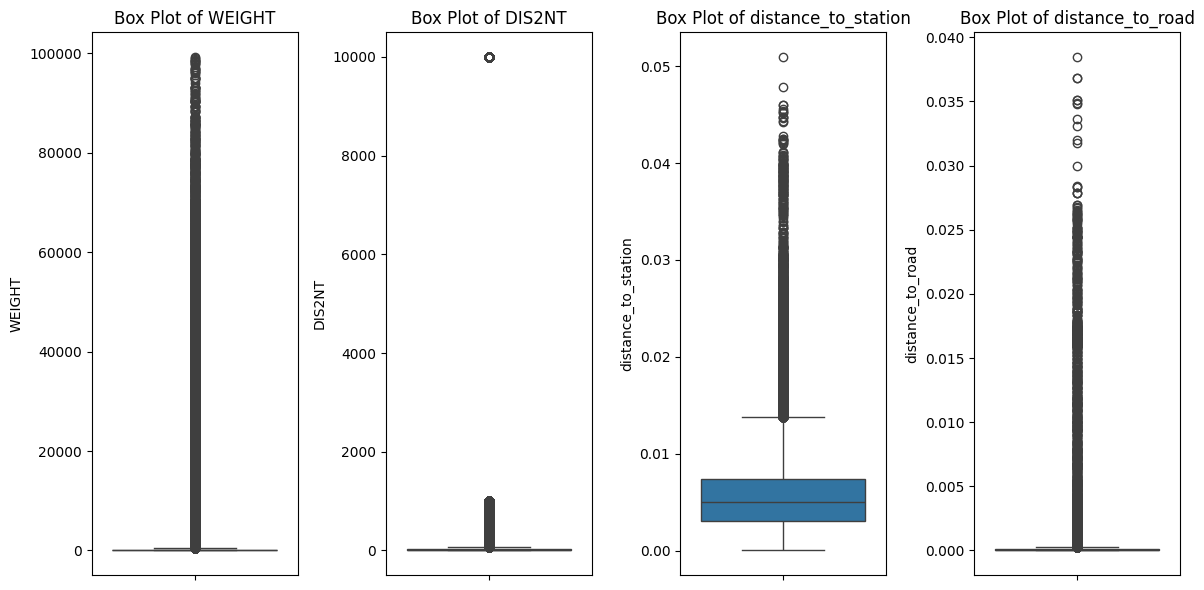

In [54]:
# Select relevant numerical columns for outlier detection
num_cols = ["WEIGHT", "DIS2NT", "distance_to_station", "distance_to_road"]

# Compute IQR and detect outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Apply outlier detection to selected columns
outlier_info = {}
for col in num_cols:
    outliers, lb, ub = detect_outliers_iqr(df, col)
    outlier_info[col] = {"outlier_count": outliers.shape[0], "lower_bound": lb, "upper_bound": ub}

# Print summary of detected outliers
print(pd.DataFrame(outlier_info).T)

# Plot boxplots to visualize outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()


In [55]:
df[df['DIS2NT'] == 9999]

,WEIGHT,DIS2NT,displaylat,displaylon,distance_to_station,distance_to_road,fclass_cycleway,fclass_footway,fclass_living_street,fclass_motorway,...,fclass_steps,fclass_tertiary,fclass_tertiary_link,fclass_track,fclass_track_grade3,fclass_track_grade5,fclass_trunk,fclass_trunk_link,fclass_unclassified,tunnel_T
4,1,9999,-6.373070,106.872050,0.003617,0.000004,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,9999,-6.373070,106.872050,0.003718,0.000029,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,9999,-6.182198,106.982084,0.004562,0.000036,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1111,9999,-6.373070,106.872050,0.002735,0.000013,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,425,9999,-6.373070,106.872050,0.002782,0.000186,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466239,4,9999,-6.321253,106.937201,0.005987,0.000064,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466264,3,9999,-6.364989,106.833543,0.007321,0.000039,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466270,8,9999,-6.364989,106.833543,0.007382,0.000040,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466283,179,9999,-6.374970,106.914140,0.001697,0.000012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df[df['DIS2NT'] != 9999]

,WEIGHT,DIS2NT,displaylat,displaylon,distance_to_station,distance_to_road,fclass_cycleway,fclass_footway,fclass_living_street,fclass_motorway,...,fclass_steps,fclass_tertiary,fclass_tertiary_link,fclass_track,fclass_track_grade3,fclass_track_grade5,fclass_trunk,fclass_trunk_link,fclass_unclassified,tunnel_T
0,1,31,-6.344676,106.848766,0.004223,0.000025,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,172,-6.344676,106.848766,0.003987,0.000054,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4,166,-6.344676,106.848766,0.003995,0.000081,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,750,-6.182198,106.982084,0.004216,0.000027,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3148,1,-6.289615,106.896547,0.002597,0.000010,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466335,175,1,-6.148502,106.916765,0.001304,0.000014,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466336,9,1,-6.290469,106.823484,0.003126,0.000009,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466337,1,49,-6.148502,106.916765,0.000841,0.000441,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466338,1,97,-6.291337,106.888375,0.006269,0.000941,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [11]:
# Convert back to DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=df.columns, index=df.index)

# Display the standardized DataFrame
print(df_scaled.head())

     WEIGHT    DIS2NT  displaylat  displaylon  distance_to_station  \
0 -0.216783 -0.314019   -1.805002    0.190692            -0.381321   
1 -0.216783 -0.263028   -1.805002    0.190692            -0.452034   
2 -0.216112 -0.265198   -1.805002    0.190692            -0.449793   
3 -0.216559 -0.054001    0.410585    1.970852            -0.383237   
4 -0.216783  3.290788   -2.192196    0.501597            -0.563316   

   distance_to_road  fclass_cycleway  fclass_footway  fclass_living_street  \
0         -0.137631        -0.027523       -0.092979             -0.382989   
1         -0.090011        -0.027523       -0.092979              2.611043   
2         -0.045570        -0.027523       -0.092979              2.611043   
3         -0.133977        -0.027523       -0.092979             -0.382989   
4         -0.172671        -0.027523       -0.092979             -0.382989   

   fclass_motorway  ...  fclass_steps  fclass_tertiary  fclass_tertiary_link  \
0        -0.147441  ...      -

In [59]:
# Apply K-Means with 2 clusters (stale, not stale)
kmeans = KMeans(n_clusters=2, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

# Check cluster counts
print(df["cluster"].value_counts())

cluster
1    370109
0     96231
Name: count, dtype: int64


In [12]:
import pandas as pd
import geopandas as gpd
import folium
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Ensure 'geometry' is a valid GeoSeries
if not isinstance(df_scaled["geometry"], gpd.GeoSeries):
    df_scaled["geometry"] = gpd.GeoSeries(df_scaled["geometry"])

# Select numerical columns
numerical_cols = df_scaled.select_dtypes(include="number")

# Scale the numerical data for better anomaly detection
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_cols)

# Train Isolation Forest with refined parameters
iso_forest = IsolationForest(n_estimators=300, contamination=0.001, random_state=42)
df_scaled["anomaly_score"] = iso_forest.fit_predict(scaled_features)

# Compute anomaly scores for all rows
df_scaled["anomaly_value"] = iso_forest.decision_function(scaled_features)  # Lower = stronger anomaly

# Extract anomalies
anomalies = df_scaled[df_scaled["anomaly_score"] == -1]

# If too many anomalies, keep the 25 most extreme ones
if len(anomalies) > 25:
    anomalies = anomalies.nsmallest(25, "anomaly_value")  # Select most extreme anomalies

# Group anomalies by placeid and keep only one entry per petrol pump
anomaly_pumps = anomalies.groupby("placeid").first().reset_index()

# ------------------- Visualization -------------------
# Center map at the mean of petrol pump locations
m = folium.Map(
    location=[df_scaled["displaylat"].mean(), df_scaled["displaylon"].mean()], zoom_start=12
)

# Plot unique petrol pumps detected as anomalies
for _, row in anomaly_pumps.iterrows():
    lat, lon = row.geometry.y, row.geometry.x  # Extract petrol pump location
    popup_text = f"""
    <b>Anomalous Petrol Pump</b><br>
    <b>PlaceID:</b> {row['placeid']}<br>
    <b>Coordinates:</b> ({lat}, {lon})
    """
    folium.Marker(
        location=[lat, lon],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color="red", icon="exclamation-triangle"),
    ).add_to(m)

# Save the map
m.save("anomalous_petrol_pumps_map.html")
print(f"Map saved as anomalous_petrol_pumps_map.html with {len(anomaly_pumps)} anomalies.")

KeyError: 'geometry'